<a href="https://colab.research.google.com/github/ish-war/zomato-ratings-app/blob/main/Zomato_App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **End-To-End Deployment of Zomato Restaurant Ratings**

## **Objective**

Main Objective:

The main agenda of this project is:

Perform extensive Exploratory Data Analysis(EDA) on the Zomato Dataset.

Build an appropriate Machine Learning Model that will help various Zomato Restaurants to predict their respective Ratings based on certain features

DEPLOY the Machine learning model via Flask that can be used to make live predictions of restaurants ratings

## **Columns description**


**url :** contains the url of the restaurant in the zomato website

**address :** contains the address of the restaurant in Bengaluru

**name :** contains the name of the restaurant

**online_order :** whether online ordering is available in the restaurant or not

**book_table **: table book option available or not

**rate :** contains the overall rating of the restaurant out of 5

**votes :** contains total number of rating for the restaurant as of the above mentioned date

**phone :** contains the phone number of the restaurant

**location :** contains the neighborhood in which the restaurant is located

**rest_type :** restaurant type

**dish_liked :** dishes people liked in the restaurant

**cuisines :** food styles, separated by comma

**approx_cost(for two people) :** contains the approximate cost of meal for two people

**reviews_list :** list of tuples containing reviews for the restaurant, each tuple

**menu_item :** contains list of menus available in the restaurant

**listed_in(type) :** type of meal

**listed_in(city) :** contains the neighborhood in which the restaurant is listed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  ExtraTreesRegressor
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/zomato.csv')
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [4]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
df.tail()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


In [6]:
df.shape

(51717, 17)

In [7]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [8]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [9]:
df.isnull().sum().sort_values(ascending=False)[:10]

dish_liked                     28078
rate                            7775
phone                           1208
approx_cost(for two people)      346
rest_type                        227
cuisines                          45
location                          21
listed_in(type)                    0
menu_item                          0
reviews_list                       0
dtype: int64

In [10]:
df = df.drop(['url', 'phone'], axis =1)

In [11]:
df.duplicated().sum()

43

In [12]:
df.drop_duplicates(inplace= True)

In [13]:
df.duplicated().sum()

0

In [14]:
df.dropna(how= 'any', inplace = True)
df.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

## **Renaming columes appropriately**

In [15]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [16]:
df = df.rename(columns = {'approx_cost(for two people)' : 'cost',  'listed_in(type)' : 'type', 'listed_in(city)' : 'city'})
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

## **check for unique values**

In [17]:
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

In [18]:
df['cost'] = df['cost'].apply(lambda x : x.replace(',' , ''))
df['cost'] = df['cost'].astype(float)

In [19]:
print(df['cost'].unique())
print('-'*40)
print(df.dtypes)

[ 800.  300.  600.  700.  550.  500.  450.  650.  400.  750.  200.  850.
 1200.  150.  350.  250. 1500. 1300. 1000.  100.  900. 1100. 1600.  950.
  230. 1700. 1400. 1350. 2200. 2000. 1800. 1900.  180.  330. 2500. 2100.
 3000. 2800. 3400.   40. 1250. 3500. 4000. 2400. 1450. 3200. 6000. 1050.
 4100. 2300.  120. 2600. 5000. 3700. 1650. 2700. 4500.]
----------------------------------------
address          object
name             object
online_order     object
book_table       object
rate             object
votes             int64
location         object
rest_type        object
dish_liked       object
cuisines         object
cost            float64
reviews_list     object
menu_item        object
type             object
city             object
dtype: object


In [20]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [21]:
df = df.loc[df.rate != 'NEW']

In [22]:

df['rate'] = df['rate'].apply(lambda x : x.replace('/5' , ''))
df['rate'] = df['rate'].astype(float)

In [23]:
df.dtypes

address          object
name             object
online_order     object
book_table       object
rate            float64
votes             int64
location         object
rest_type        object
dish_liked       object
cuisines         object
cost            float64
reviews_list     object
menu_item        object
type             object
city             object
dtype: object

In [24]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

## **EDA**

### ch 1 - What are most famous restaurent chain in Bengaluru ?  

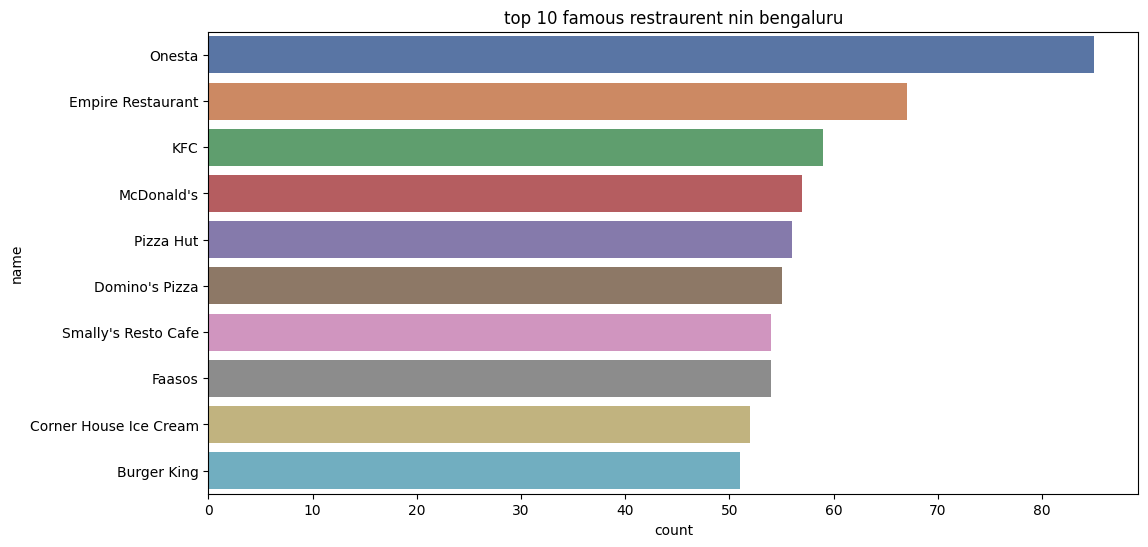

In [25]:
plt.figure(figsize = (12,6))
name = df['name'].value_counts() [:10]
sns.barplot(x=name, y=name.index, palette = 'deep')
plt.title('top 10 famous restraurent nin bengaluru')
plt.xlabel('count')
plt.ylabel('name')
plt.show()

### ch 2 - Does restaurent accepts prior table bookings ?

In [26]:
df['book_table'].value_counts()

book_table
No     17191
Yes     6057
Name: count, dtype: int64

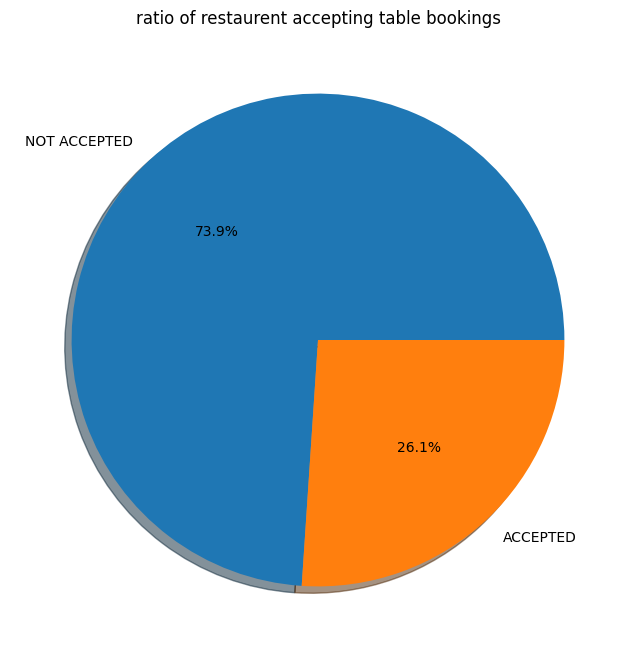

In [27]:
plt.figure(figsize= (8,8))
labels = ['NOT ACCEPTED', 'ACCEPTED']
plt.pie(df['book_table'].value_counts(), autopct = '%0.01f%%', labels = labels, shadow = True)
plt.title('ratio of restaurent accepting table bookings')
plt.show()

### Ch 3 - How many restaurents allow online delivery ?

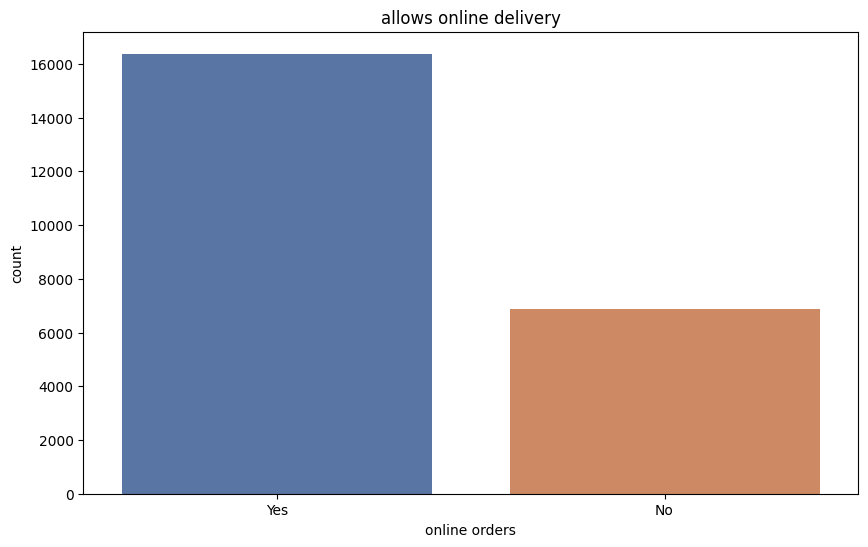

In [28]:
plt.figure(figsize = (10,6))
sns.countplot(data = df, x= 'online_order', palette = 'deep')
plt.title('allows online delivery')
plt.xlabel('online orders')
plt.ylabel('count')
plt.show()

### ch 4 - How ratings are distributed ?

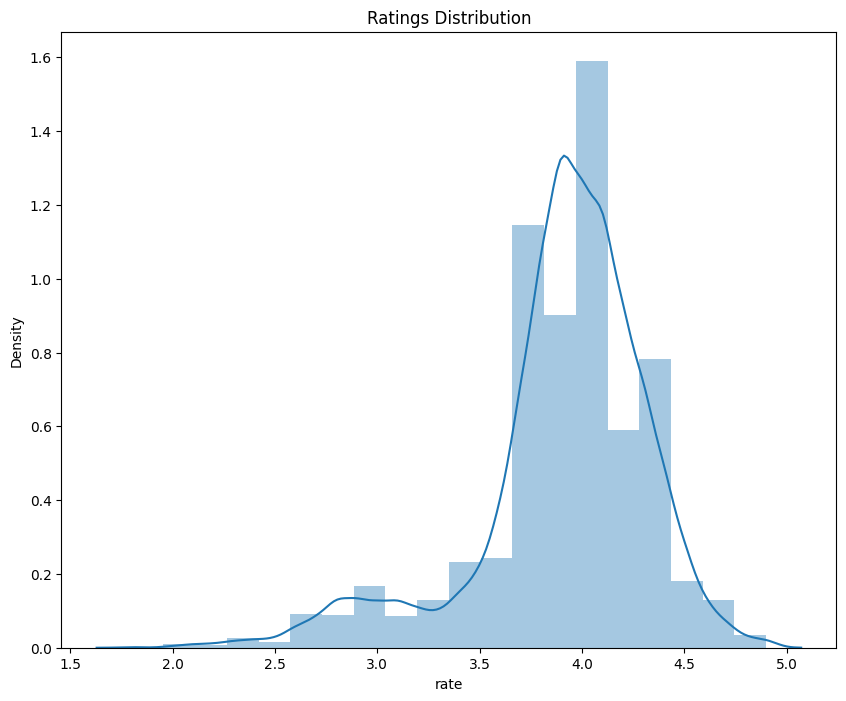

In [29]:

plt.figure(figsize=(10,8 ))
sns.distplot(df['rate'],bins=20)
plt.title('Ratings Distribution')
plt.xlabel('rate')
plt.ylabel('Density')
plt.show()

### ch 5 - What is the distribution of online orders for ratings and cost ?

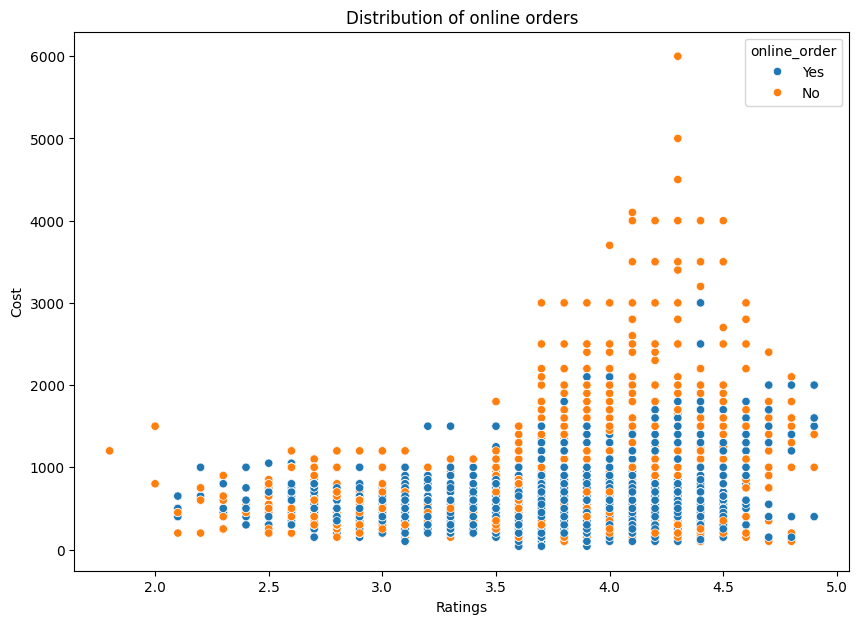

In [30]:
# Distribution of the cost Vs ratings in parallel with online order
plt.figure(figsize=(10,7))
sns.scatterplot(x="rate",y='cost',hue='online_order',data=df)
plt.title('Distribution of online orders')
plt.xlabel('Ratings')
plt.ylabel('Cost')
plt.show()


### ch 6 - What is the percentage of restaurants according to their ratings ?

 Count of ratings as between "1 and 2", "2 and 3", "3 and 4", and "4 and 5"

In [31]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 4.6, 4. , 4.2, 3.9, 3. , 3.6, 2.8, 4.4, 3.1, 4.3,
       2.6, 3.3, 3.5, 3.2, 4.5, 2.5, 2.9, 3.4, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [32]:
print(df['rate'].min())
print(df['rate'].max())
print ("count of rate between 1-2 :", ((df['rate']>=1) & (df['rate']<2)).sum())
print ("count of rate between 2-3 :", ((df['rate']>=2) & (df['rate']<3)).sum())
print ("count of rate between 3-4 :", ((df['rate']>=3) & (df['rate']<4)).sum())
print ("count of rate between 4-5 :", (df['rate']>=4).sum())

1.8
4.9
count of rate between 1-2 : 5
count of rate between 2-3 : 1179
count of rate between 3-4 : 10153
count of rate between 4-5 : 11911


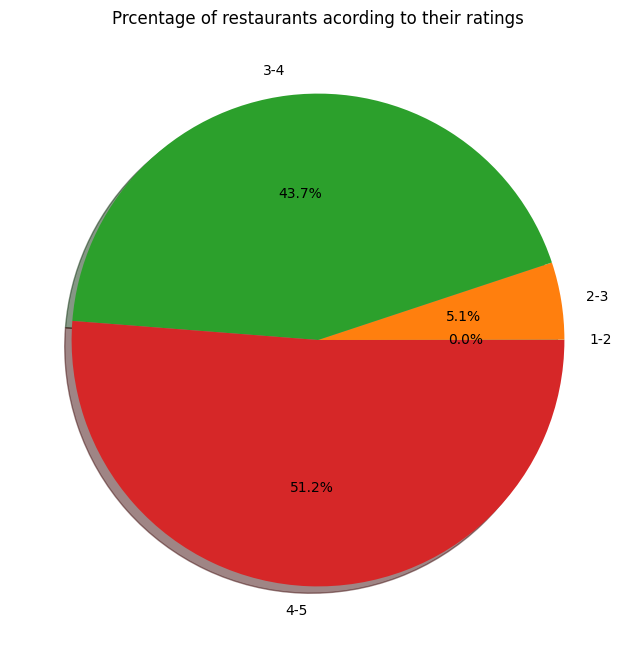

In [33]:
pie = [((df['rate']>=1) & (df['rate']<2)).sum(),
       ((df['rate']>=2) & (df['rate']<3)).sum(),
       ((df['rate']>=3) & (df['rate']<4)).sum(),
       (df['rate']>=4).sum()]
labels = ['1-2', '2-3', '3-4', '4-5']
plt.figure(figsize = (8,8))
plt.pie(pie, labels = labels, autopct = '%0.01f%%', shadow = True)
plt.title('Prcentage of restaurants acording to their ratings')
plt.show()

### ch 7 - What are the services provided by the restaurants ?

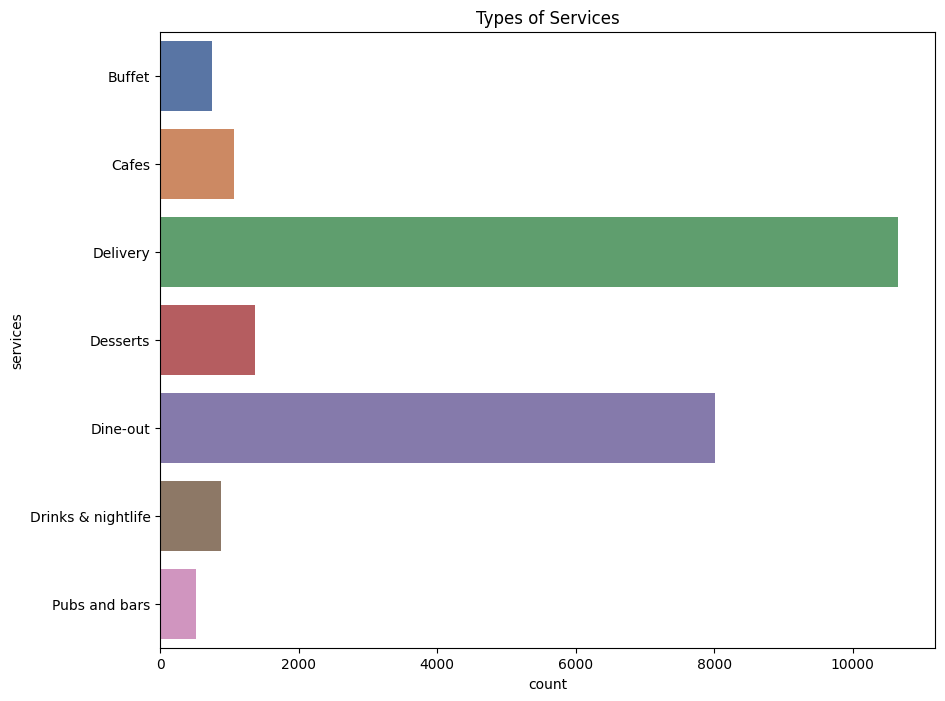

In [34]:
plt.figure(figsize = (10,8))
sns.countplot(df['type'], palette = 'deep')
plt.title('Types of Services')
plt.xlabel('count')
plt.ylabel('services')
plt.show()

### ch 8 - How much restaurants charger for cost of Food for two People ?

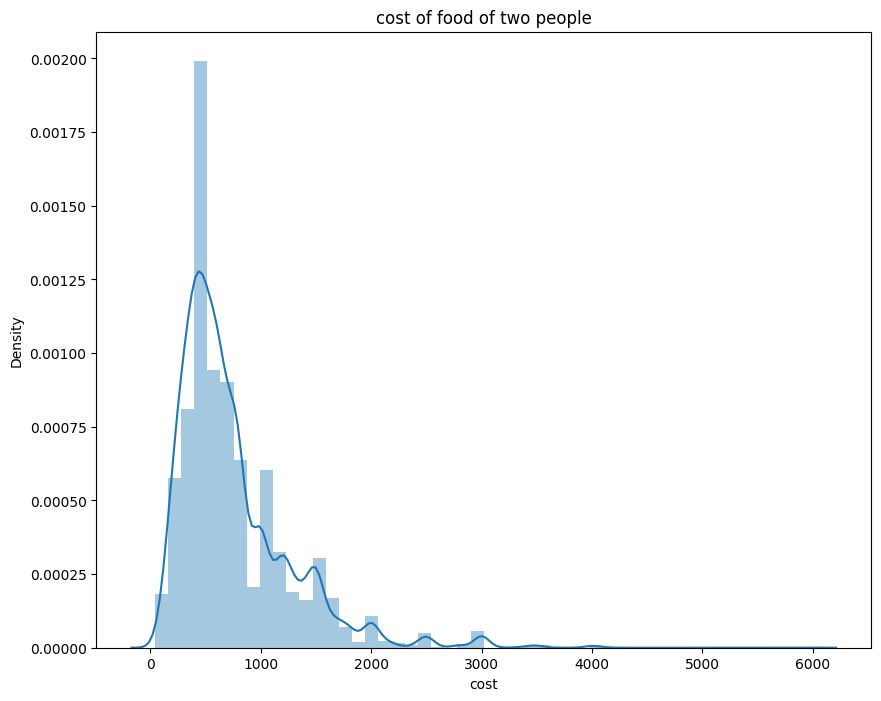

In [35]:
plt.figure(figsize = (10,8))
sns.distplot(df['cost'])
plt.title('cost of food of two people')
plt.xlabel('cost')
plt.ylabel('Density')
plt.show()

### ch 9 - What type of restaurants are the most preferred ?

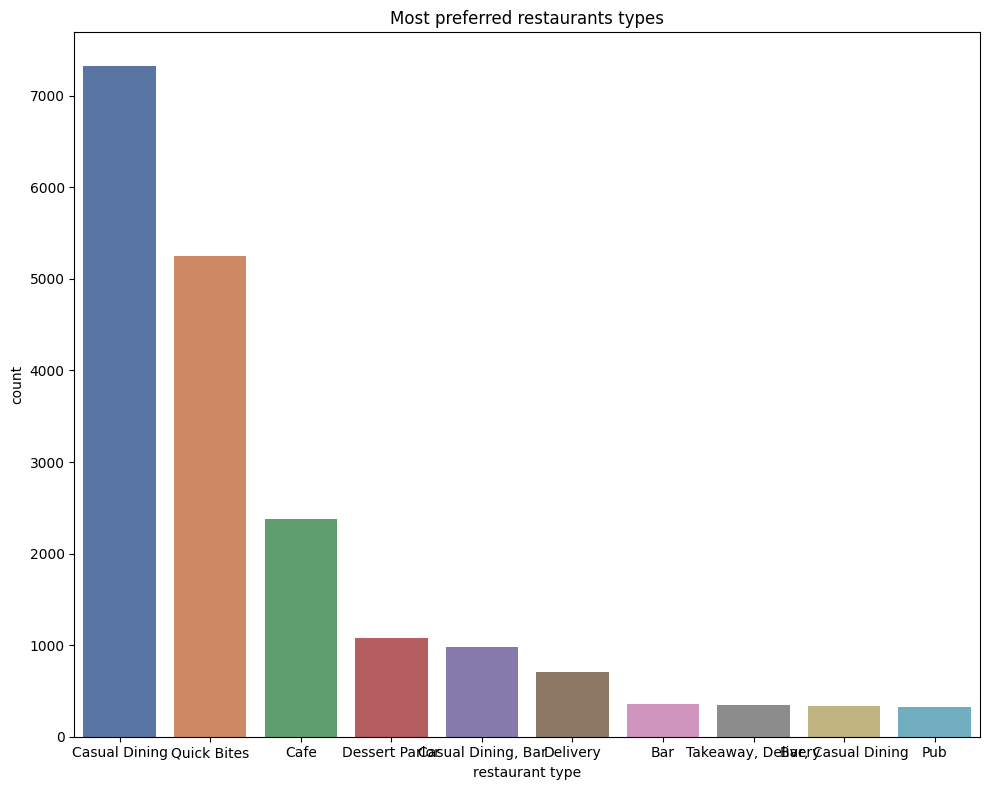

In [36]:
plt.figure(figsize = (10,8))
sns.barplot(df['rest_type'].value_counts()[:10], palette = 'deep')
plt.title('Most preferred restaurants types')
plt.xlabel('restaurant type')
plt.ylabel('count')
plt.tight_layout()
plt.show()

### ch 10 - What is the relationship between type of restaurants and table booked ?

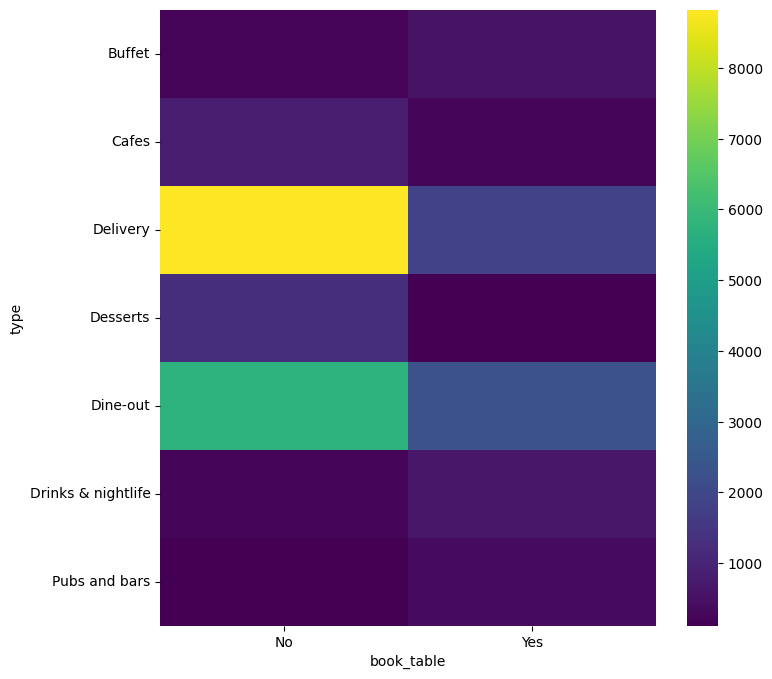

In [37]:

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['type'].value_counts()
    for x_label, grp in df.groupby('book_table')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('book_table')
_ = plt.ylabel('type')


## **Model Building**

In [38]:
df.head(2)

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


### Convert Categorical variables into numeric format

In [39]:
df.online_order[df.online_order == 'Yes'] = 1
df.online_order[df.online_order == 'No'] = 0

df['online_order'].value_counts()

online_order
1    16378
0     6870
Name: count, dtype: int64

In [40]:
df.online_order = pd.to_numeric(df.online_order)

In [41]:
df['book_table'][df['book_table'] == 'Yes'] = 1
df['book_table'][df['book_table'] == 'No'] = 0

df['book_table'].value_counts()

book_table
0    17191
1     6057
Name: count, dtype: int64

### label encoder for categorical columns to make it easy to build algorithm

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [43]:
df.location = le.fit_transform(df.location)
df.rest_type = le.fit_transform(df.rest_type)
df.cuisines = le.fit_transform(df.cuisines)
df.menu_item = le.fit_transform(df.menu_item)

In [54]:
my_data=df.iloc[:,[2,3,4,5,6,7,9,10,12]]
my_data.to_csv('Zomato_df.csv')

In [45]:
x = df.iloc[:,[2,3,5,6,7,9,10,12]]
x.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,775,1,20,1386,800.0,5047
1,1,0,787,1,20,594,800.0,5047
2,1,0,918,1,16,484,800.0,5047
3,0,0,88,1,62,1587,300.0,5047
4,0,0,166,4,20,1406,600.0,5047


In [46]:
y = df['rate']
y

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51705    3.8
51707    3.9
51708    2.8
51711    2.5
51715    4.3
Name: rate, Length: 23248, dtype: float64

In [47]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state= 42)

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  ExtraTreesRegressor
from sklearn.model_selection import train_test_split

### **Linear regression**

In [49]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [50]:
from sklearn.metrics import r2_score

y_pred = lr_model.predict(x_test)
r2_score(y_test,y_pred)

0.2233033484225515

### **Random Forest**

In [51]:

from sklearn.ensemble import RandomForestRegressor

RF_Model = RandomForestRegressor(n_estimators= 650, random_state= 42, min_samples_leaf= 0.0001)
RF_Model.fit(x_train,y_train)
y_predict = RF_Model.predict(x_test)
r2_score(y_test,y_predict)

0.8800069723999693

### **Extra Tree Regressor**

In [52]:
from sklearn.ensemble import ExtraTreesRegressor
ET_model = ExtraTreesRegressor(n_estimators= 120)
ET_model.fit(x_train, y_train)
y_pred = ET_model.predict(x_test)

r2_score(y_test, y_pred)

0.9262245821529966

## **Pickle file save**

In [53]:
import pickle

pickle.dump(ET_model, open('model.pkl', 'wb'))      # wb - written binary
model = pickle.load(open('model.pkl', 'rb'))        # rb - read binary